In [3]:
import numpy as np
import matplotlib.pyplot as mp
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.metrics as sm
import sklearn.model_selection as ms

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 1000

In [4]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [5]:
def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)

In [7]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

In [8]:
dfs = [df_train, df_test]
df_train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.250,D37,C
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.925,NaN,S
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.500,NaN,S


In [9]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing value: {}'.format(col, df[col].isnull().sum()))
    print('\n')
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing value: 0
Survived column missing value: 0
Pclass column missing value: 0
Name column missing value: 0
Sex column missing value: 0
Age column missing value: 177
SibSp column missing value: 0
Parch column missing value: 0
Ticket column missing value: 0
Fare column missing value: 0
Cabin column missing value: 687
Embarked column missing value: 2


Test Set
PassengerId column missing value: 0
Pclass column missing value: 0
Name column missing value: 0
Sex column missing value: 0
Age column missing value: 86
SibSp column missing value: 0
Parch column missing value: 0
Ticket column missing value: 0
Fare column missing value: 1
Cabin column missing value: 327
Embarked column missing value: 0




In [10]:
df_all.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [11]:
df_all_corr=df_all.corr().abs().unstack().sort_values(kind='quicksort',ascending=False).reset_index()
df_all_corr

,level_0,level_1,0
0,Survived,Survived,1.000000
1,SibSp,SibSp,1.000000
2,Fare,Fare,1.000000
3,Parch,Parch,1.000000
4,Pclass,Pclass,1.000000
5,PassengerId,PassengerId,1.000000
6,Age,Age,1.000000
7,Fare,Pclass,0.558629
8,Pclass,Fare,0.558629
9,Age,Pclass,0.408106


In [12]:
df_all_corr.rename(columns={'level_0':'Feature 1', 'level_1':'Feature 2',
                            0:'Correlation Coefficient'}, inplace=True)
df_all_corr

,Feature 1,Feature 2,Correlation Coefficient
0,Survived,Survived,1.000000
1,SibSp,SibSp,1.000000
2,Fare,Fare,1.000000
3,Parch,Parch,1.000000
4,Pclass,Pclass,1.000000
5,PassengerId,PassengerId,1.000000
6,Age,Age,1.000000
7,Fare,Pclass,0.558629
8,Pclass,Fare,0.558629
9,Age,Pclass,0.408106


In [13]:
df_all_corr[df_all_corr['Feature 1']=='Fare']

,Feature 1,Feature 2,Correlation Coefficient
2,Fare,Fare,1.000000
7,Fare,Pclass,0.558629
16,Fare,Survived,0.257307
20,Fare,Parch,0.221539
21,Fare,Age,0.178740
23,Fare,SibSp,0.160238
40,Fare,PassengerId,0.031428


In [14]:
shapiro_age, p = stats.shapiro(df_all.loc[:,['Fare']].dropna())
print(p)

0.0


In [15]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [16]:
med_fare = df_all.groupby(['Parch','Pclass','SibSp']).Fare.median()[0][3][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

In [17]:
df_all_corr[df_all_corr['Feature 1']=='Age']

,Feature 1,Feature 2,Correlation Coefficient
6,Age,Age,1.000000
9,Age,Pclass,0.408106
17,Age,SibSp,0.243699
22,Age,Fare,0.178740
25,Age,Parch,0.150917
29,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In [18]:
shapiro_age, p = stats.shapiro(df_all.loc[:,['Age']].dropna())
print(p)

female_age = df_all.loc[df_all['Sex']=='female',['Age']].dropna()
male_age = df_all.loc[df_all['Sex']=='male',['Age']].dropna()
# female_age.head()
Tt, p = stats.ttest_ind(female_age.loc[:,'Age'], male_age.loc[:,'Age'])
print(p)

stat, p, med, tbl = stats.median_test(female_age.loc[:,'Age'], male_age.loc[:,'Age'])
print(p)

5.74782790807582e-11
0.03958770007671348
0.39247502235548404


In [19]:
female_1 = df_all.loc[(df_all['Pclass']==1)&(df_all['Sex']=='female'),['Age']].dropna()
female_2 = df_all.loc[(df_all['Pclass']==2)&(df_all['Sex']=='female'),['Age']].dropna()
female_3 = df_all.loc[(df_all['Pclass']==3)&(df_all['Sex']=='female'),['Age']].dropna()
stat, p = stats.f_oneway(female_1, female_2, female_3)
print(p)
male_1 = df_all.loc[(df_all['Pclass']==1)&(df_all['Sex']=='male'),['Age']].dropna()
male_2 = df_all.loc[(df_all['Pclass']==2)&(df_all['Sex']=='male'),['Age']].dropna()
male_3 = df_all.loc[(df_all['Pclass']==3)&(df_all['Sex']=='male'),['Age']].dropna()
stat, p = stats.f_oneway(male_1, male_2, male_3)
print(p)

[1.27578628e-18]
[1.01425403e-28]


In [20]:
age_by_pclass_sex = df_all.groupby(['Sex','Pclass']).median()['Age']
for pclass in range(1, 4):
    for sex in ['female','male']:
        print('Median age of pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex, pclass]))
print('Median age of all pessengers:{}'.format(df_all['Age'].median()))
df_all['Age'] = df_all.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

Median age of pclass 1 females: 36.0
Median age of pclass 1 males: 42.0
Median age of pclass 2 females: 28.0
Median age of pclass 2 males: 29.5
Median age of pclass 3 females: 22.0
Median age of pclass 3 males: 25.0
Median age of all pessengers:28.0


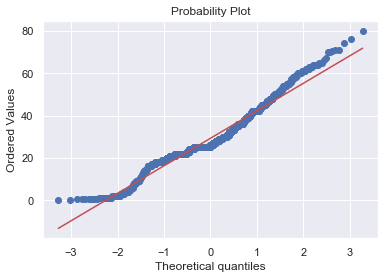

lambda=0.751393574356586


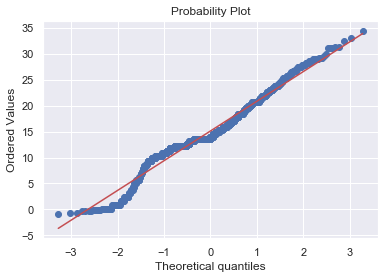

[12.2466548  19.14168134 14.06253422 ... 19.34375915 13.61550726
 13.61550726]


In [21]:
age_all = df_all.loc[:,'Age']
stats.probplot(age_all,plot=mp)
mp.show()

x, lambda_box = stats.boxcox(df_all.loc[:,'Age'])
print('lambda={}'.format(lambda_box))
stats.probplot(x, plot=mp)
mp.show()
df_all.loc[:,'Age'] = x
print(x)

In [22]:
df_all.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

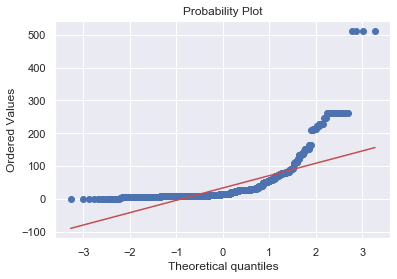

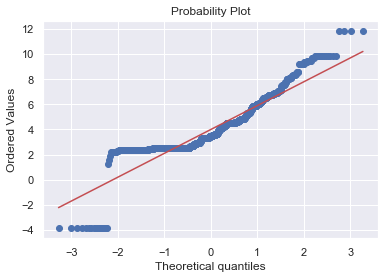

(106.18175044619605, 0.25252609240692425, -1.5922706193161118, 0.0323692260660689)


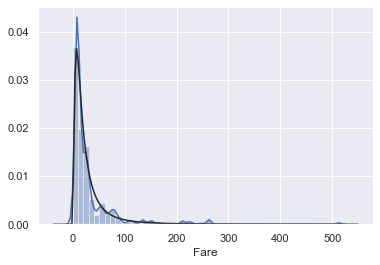

In [23]:
fare_all = df_all.loc[:,'Fare']
stats.probplot(fare_all, plot=mp)
mp.show()

x, lambda_box = stats.boxcox(df_all.loc[:,'Fare']+0.001)
stats.probplot(x, plot=mp)
mp.show()

sns.distplot(df_all['Fare'],fit=stats.exponweib)
print(stats.exponweib.fit(df_all['Fare']))
df_all.loc[:,'Fare'] = stats.exponweib.cdf(df_all['Fare'],
stats.exponweib.fit(df_all['Fare'])[0],
stats.exponweib.fit(df_all['Fare'])[1],
stats.exponweib.fit(df_all['Fare'])[2],
stats.exponweib.fit(df_all['Fare'])[3])

In [24]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

In [25]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_all.groupby(['Deck','Pclass']).count()

Age  Cabin  Embarked  Fare  Name  Parch  PassengerId  Sex  SibSp  \
Deck Pclass                                                                     
A    1        22     22        22    22    22     22           22   22     22   
B    1        65     65        65    65    65     65           65   65     65   
C    1        94     94        94    94    94     94           94   94     94   
D    1        40     40        40    40    40     40           40   40     40   
     2         6      6         6     6     6      6            6    6      6   
E    1        34     34        34    34    34     34           34   34     34   
     2         4      4         4     4     4      4            4    4      4   
     3         3      3         3     3     3      3            3    3      3   
F    2        13     13        13    13    13     13           13   13     13   
     3         8      8         8     8     8      8            8    8      8   
G    3         5      5         5     5     5      5            5    5      5   
M    1        67      0        67    67    67     67           67   67     67   
     2       254      0       254   254   254    254          254  254    254   
     3       693      0       693   693   693    693          693  693    693   
T    1         1      1         1     1     1      1            1    1      1   

             Survived  Ticket  
Deck Pclass                    
A    1             15      22  
B    1             47      65  
C    1             59      94  
D    1             29      40  
     2              4       6  
E    1             25      34  
     2              4       4  
     3              3       3  
F    2              8      13  
     3              5       8  
G    3              4       5  
M    1             40      67  
     2            168     254  
     3            479     693  
T    1              1       1

In [26]:
df_all_decks = df_all.groupby(['Deck','Pclass']).count().drop(columns=['Age','Cabin','Embarked','Fare',
'Parch','PassengerId','Sex','SibSp','Survived','Ticket']).rename(columns={'Name':'Count'}).transpose()

df_all_decks

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

In [27]:
def get_pclass_dist(df):
    deck_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}, 'T':{}}
    decks = df.columns.levels[0]
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0
    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}
    for col in df_decks:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
    return deck_counts, deck_percentages
all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
all_deck_count, all_deck_per

({'A': {1: 22, 2: 0, 3: 0},
  'B': {1: 65, 2: 0, 3: 0},
  'C': {1: 94, 2: 0, 3: 0},
  'D': {1: 40, 2: 6, 3: 0},
  'E': {1: 34, 2: 4, 3: 3},
  'F': {1: 0, 2: 13, 3: 8},
  'G': {1: 0, 2: 0, 3: 5},
  'M': {1: 67, 2: 254, 3: 693},
  'T': {1: 1, 2: 0, 3: 0}},
 {'A': [100.0, 0.0, 0.0],
  'B': [100.0, 0.0, 0.0],
  'C': [100.0, 0.0, 0.0],
  'D': [86.95652173913044, 13.043478260869565, 0.0],
  'E': [82.92682926829268, 9.75609756097561, 7.317073170731707],
  'F': [0.0, 61.904761904761905, 38.095238095238095],
  'G': [0.0, 0.0, 100.0],
  'M': [6.607495069033531, 25.04930966469428, 68.34319526627219],
  'T': [100.0, 0.0, 0.0]})

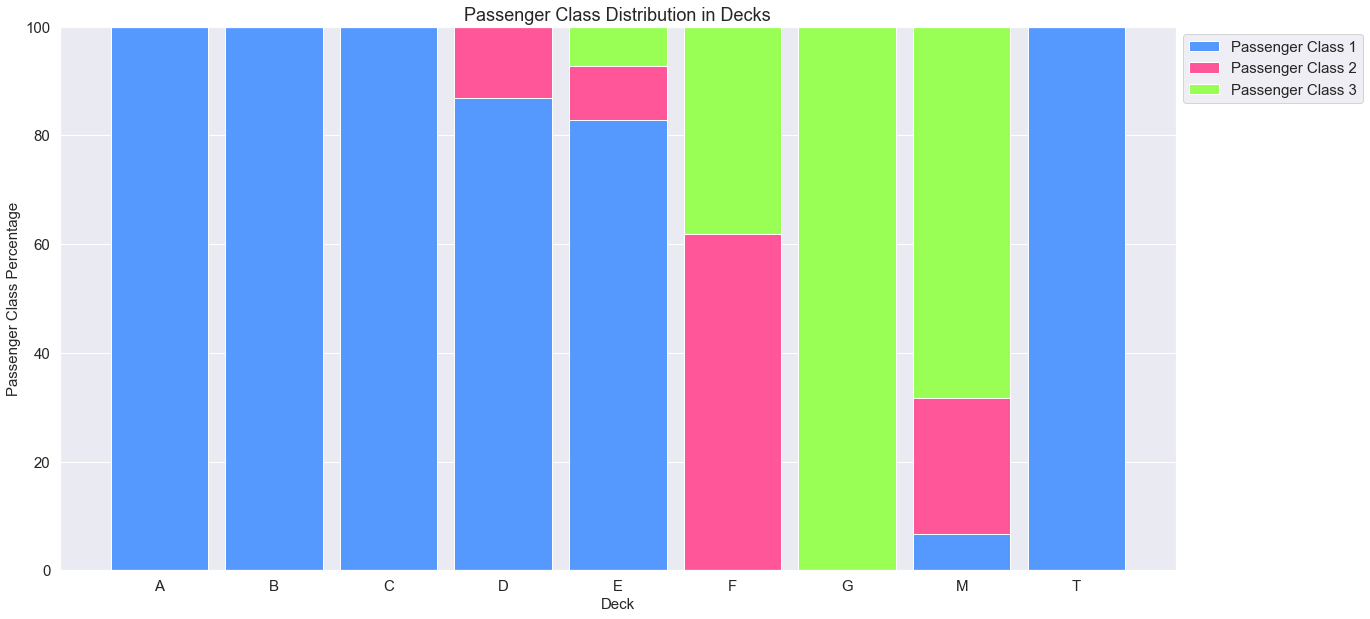

In [28]:
def display_surv_dist(per):
    df_per = pd.DataFrame(per).T
    deck_names = ['A','B','C','D','E','F','G','M','T']
    back_count = np.arange(len(deck_names))
    
    pclass1 = df_per[0]
    pclass2 = df_per[1]
    pclass3 = df_per[2]
    mp.figure(figsize=(20,10))
    mp.title('Passenger Class Distribution in Decks', fontsize=18)
    mp.xlabel('Deck',fontsize=15)
    mp.ylabel('Passenger Class Percentage',fontsize=15)
    mp.xticks(back_count,deck_names)
    mp.tick_params(labelsize=15)
    mp.bar(back_count, pclass1, width=0.85, color='#5599ff', edgecolor='White', label='Passenger Class 1')
    mp.bar(back_count, pclass2, bottom=pclass1, width=0.85, color='#ff5599', edgecolor='White', label='Passenger Class 2')
    mp.bar(back_count, pclass3, bottom=pclass1+pclass2, width=0.85, color='#99ff55', edgecolor='White', label='Passenger Class 3')
    mp.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
    mp.show()
display_surv_dist(all_deck_per)

In [29]:
idx = df_all[df_all['Deck']=='T'].index
df_all.loc[idx,'Deck'] = 'A'

In [30]:
df_all.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

In [31]:
df_all_decks_survived = df_all.groupby(['Deck','Survived']).count().drop(columns=['Age','Cabin',
'Embarked','Name','PassengerId','Pclass','Sex','SibSp','Ticket']).rename(columns={
'Name':'Count'}).T

def get_survived_dist(df):
    decks = df.columns.levels[0]
    surv_counts = {'A':{},'B':{},'C':{},'D':{},'E':{},'F':{},'G':{},'M':{}}
    for deck in decks:
        for surv in range(2):
            surv_counts[deck][surv] = df[deck][surv][0]
    df_surv = pd.DataFrame(surv_counts)
    surv_per = {}
    for col in df_surv.columns:
        surv_per[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
    return surv_counts, surv_per
all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
all_surv_count, all_surv_per

({'A': {0: 9, 1: 7},
  'B': {0: 12, 1: 35},
  'C': {0: 24, 1: 35},
  'D': {0: 8, 1: 25},
  'E': {0: 8, 1: 24},
  'F': {0: 5, 1: 8},
  'G': {0: 2, 1: 2},
  'M': {0: 481, 1: 206}},
 {'A': [56.25, 43.75],
  'B': [25.53191489361702, 74.46808510638297],
  'C': [40.67796610169492, 59.32203389830508],
  'D': [24.242424242424242, 75.75757575757575],
  'E': [25.0, 75.0],
  'F': [38.46153846153847, 61.53846153846154],
  'G': [50.0, 50.0],
  'M': [70.01455604075691, 29.985443959243085]})

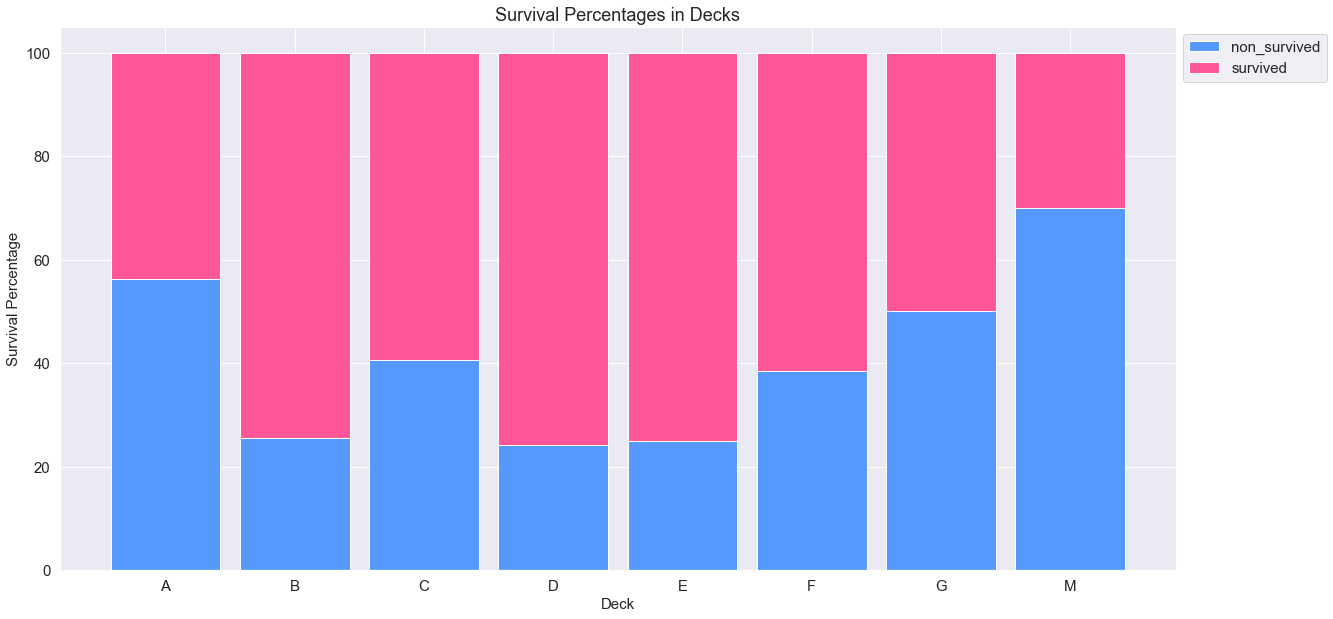

In [32]:
def display_surv_dist(per):
    df_surv_per = pd.DataFrame(per).T
    deck_names = ['A','B','C','D','E','F','G','M']
    bar_count = np.arange(len(deck_names))
    
    survived = df_surv_per[1]
    non_survived = df_surv_per[0]
    
    mp.figure(figsize=(20,10))
    mp.title('Survival Percentages in Decks', fontsize=18)
    mp.xlabel('Deck',fontsize=15)
    mp.ylabel('Survival Percentage',fontsize=15)
    mp.xticks(bar_count,deck_names)
    mp.tick_params(labelsize=15)
    mp.bar(bar_count, non_survived, width=0.85, color='#5599ff', edgecolor='White', label='non_survived')
    mp.bar(bar_count, survived, bottom=non_survived, width=0.85, color='#ff5599', edgecolor='White', label='survived')
    mp.legend(bbox_to_anchor=(1, 1), prop={'size': 15})
    mp.show()
display_surv_dist(all_surv_per)

In [33]:
df_all['Deck'] = df_all['Deck'].replace(['A','B','C'],'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D','E'],'DE')
df_all['Deck'] = df_all['Deck'].replace(['F','G'],'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [34]:
df_all.drop('Cabin',inplace=True,axis=1)
df_train, df_test = divide_df(df_all)
df_train.name = 'Training Set'
df_test.name = 'Test Set'
dfs = [df_train, df_test]

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
Age column missing value: 0
Embarked column missing value: 0
Fare column missing value: 0
Name column missing value: 0
Parch column missing value: 0
PassengerId column missing value: 0
Pclass column missing value: 0
Sex column missing value: 0
SibSp column missing value: 0
Survived column missing value: 0
Ticket column missing value: 0
Deck column missing value: 0


Test Set
Age column missing value: 0
Embarked column missing value: 0
Fare column missing value: 0
Name column missing value: 0
Parch column missing value: 0
PassengerId column missing value: 0
Pclass column missing value: 0
Sex column missing value: 0
SibSp column missing value: 0
Ticket column missing value: 0
Deck column missing value: 0




342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


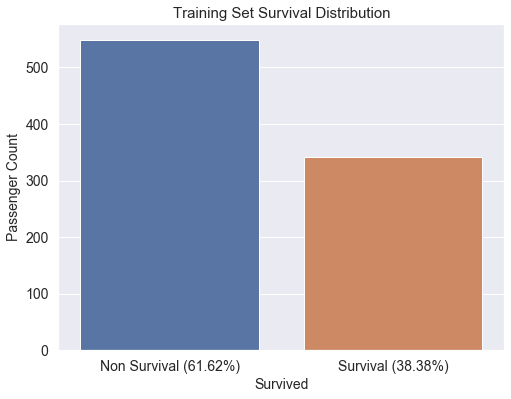

In [35]:
survived = df_train['Survived'].value_counts()[1]
non_survived = df_train['Survived'].value_counts()[0]
sur_per = survived / df_train.shape[0] * 100
nonsur_per = non_survived / df_train.shape[0] * 100
print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df_train.shape[0],sur_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(non_survived, df_train.shape[0],nonsur_per))

mp.figure(figsize=(8, 6))
sns.countplot(df_train['Survived'])
mp.title('Training Set Survival Distribution', fontsize=15)
mp.xlabel('Survived',fontsize=14)
mp.ylabel('Passenger Count',fontsize=14)
mp.xticks((0,1),['Non Survival ({:.2f}%)'.format(nonsur_per), 'Survival ({:.2f}%)'.format(sur_per)])
mp.tick_params(labelsize=14)

mp.show()

In [36]:
df_train_corr = df_train.drop(['PassengerId'],axis=1).corr().abs().unstack().sort_values(kind='quicksort',
ascending=False).reset_index()
print(df_train_corr)
df_train_corr.rename(columns={'level_0':'Feature1','level_1':'Feature2',0:'Correlation Coefficient'},
inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)
df_train_corr_nd

     level_0   level_1         0
0   Survived  Survived  1.000000
1      SibSp     SibSp  1.000000
2       Fare      Fare  1.000000
3      Parch     Parch  1.000000
4     Pclass    Pclass  1.000000
5        Age       Age  1.000000
6     Pclass      Fare  0.716772
7       Fare    Pclass  0.716772
8      SibSp     Parch  0.414838
9      Parch     SibSp  0.414838
10    Pclass       Age  0.401626
11       Age    Pclass  0.401626
12     SibSp      Fare  0.370217
13      Fare     SibSp  0.370217
14      Fare     Parch  0.368382
15     Parch      Fare  0.368382
16  Survived    Pclass  0.338481
17    Pclass  Survived  0.338481
18  Survived      Fare  0.328463
19      Fare  Survived  0.328463
20       Age     SibSp  0.271265
21     SibSp       Age  0.271265
22       Age     Parch  0.206157
23     Parch       Age  0.206157
24      Fare       Age  0.138740
25       Age      Fare  0.138740
26    Pclass     SibSp  0.083081
27     SibSp    Pclass  0.083081
28  Survived     Parch  0.081629
29     Par

,Feature1,Feature2,Correlation Coefficient
6,Pclass,Fare,0.716772
8,SibSp,Parch,0.414838
10,Pclass,Age,0.401626
12,SibSp,Fare,0.370217
14,Fare,Parch,0.368382
16,Survived,Pclass,0.338481
18,Survived,Fare,0.328463
20,Age,SibSp,0.271265
22,Age,Parch,0.206157
24,Fare,Age,0.138740


In [37]:
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature1,Feature2,Correlation Coefficient
6,Pclass,Fare,0.716772
8,SibSp,Parch,0.414838
10,Pclass,Age,0.401626
12,SibSp,Fare,0.370217
14,Fare,Parch,0.368382
16,Survived,Pclass,0.338481
18,Survived,Fare,0.328463
20,Age,SibSp,0.271265
22,Age,Parch,0.206157
24,Fare,Age,0.138740


In [38]:
df_test_corr = df_test.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
print(df_test_corr)
df_test_corr.rename(columns={'level_0':'Feature1','level_1':'Feature2',0:'Correlation Coefficient'},
inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)
df_test_corr_nd

        level_0      level_1         0
0         SibSp        SibSp  1.000000
1        Pclass       Pclass  1.000000
2          Fare         Fare  1.000000
3         Parch        Parch  1.000000
4   PassengerId  PassengerId  1.000000
5           Age          Age  1.000000
6        Pclass         Fare  0.778821
7          Fare       Pclass  0.778821
8           Age       Pclass  0.509182
9        Pclass          Age  0.509182
10        SibSp         Fare  0.342310
11         Fare        SibSp  0.342310
12        Parch         Fare  0.332359
13         Fare        Parch  0.332359
14          Age         Fare  0.326700
15         Fare          Age  0.326700
16        SibSp        Parch  0.306895
17        Parch        SibSp  0.306895
18        SibSp          Age  0.103391
19          Age        SibSp  0.103391
20        Parch          Age  0.085055
21          Age        Parch  0.085055
22  PassengerId          Age  0.044942
23          Age  PassengerId  0.044942
24        Parch  Passenge

,Feature1,Feature2,Correlation Coefficient
6,Pclass,Fare,0.778821
8,Age,Pclass,0.509182
10,SibSp,Fare,0.342310
12,Parch,Fare,0.332359
14,Age,Fare,0.326700
16,SibSp,Parch,0.306895
18,SibSp,Age,0.103391
20,Parch,Age,0.085055
22,PassengerId,Age,0.044942
24,Parch,PassengerId,0.043080


In [39]:
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature1,Feature2,Correlation Coefficient
6,Pclass,Fare,0.778821
8,Age,Pclass,0.509182
10,SibSp,Fare,0.342310
12,Parch,Fare,0.332359
14,Age,Fare,0.326700
16,SibSp,Parch,0.306895
18,SibSp,Age,0.103391


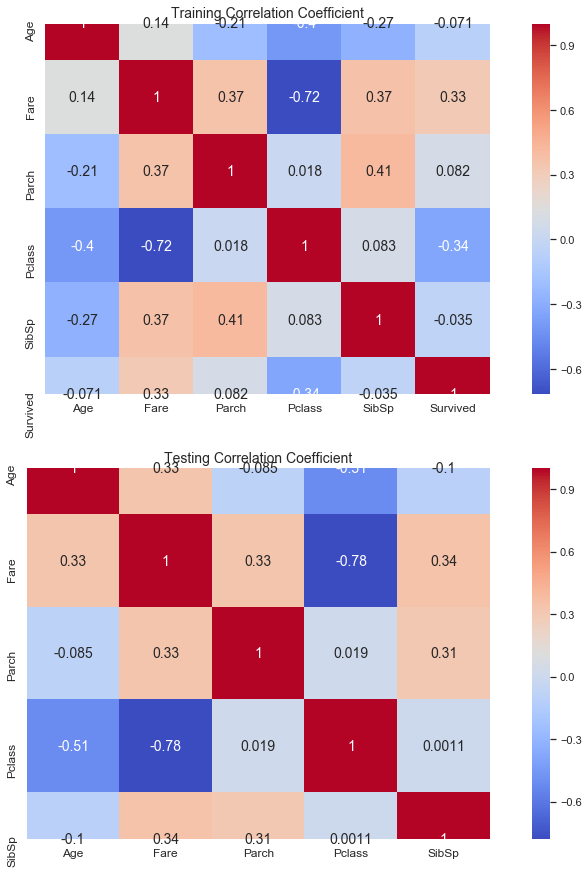

In [55]:
fig, axs = mp.subplots(nrows=2, figsize=(15, 15))

sns.heatmap(df_train.drop(['PassengerId'],axis=1).corr(), ax=axs[0], cmap='coolwarm', square=True,
           annot=True, annot_kws={'size':14})
sns.heatmap(df_test.drop(['PassengerId'],axis=1).corr(), ax=axs[1], cmap='coolwarm', square=True,
           annot=True, annot_kws={'size':14})

for i in range(2):
    axs[i].tick_params(labelsize=12)

axs[0].set_title('Training Correlation Coefficient', fontsize=14)
axs[1].set_title('Testing Correlation Coefficient', fontsize=14)

mp.show()

In [56]:
cont_feature = ['Age', 'Fare']
surv = df_train['Survived'] == 1

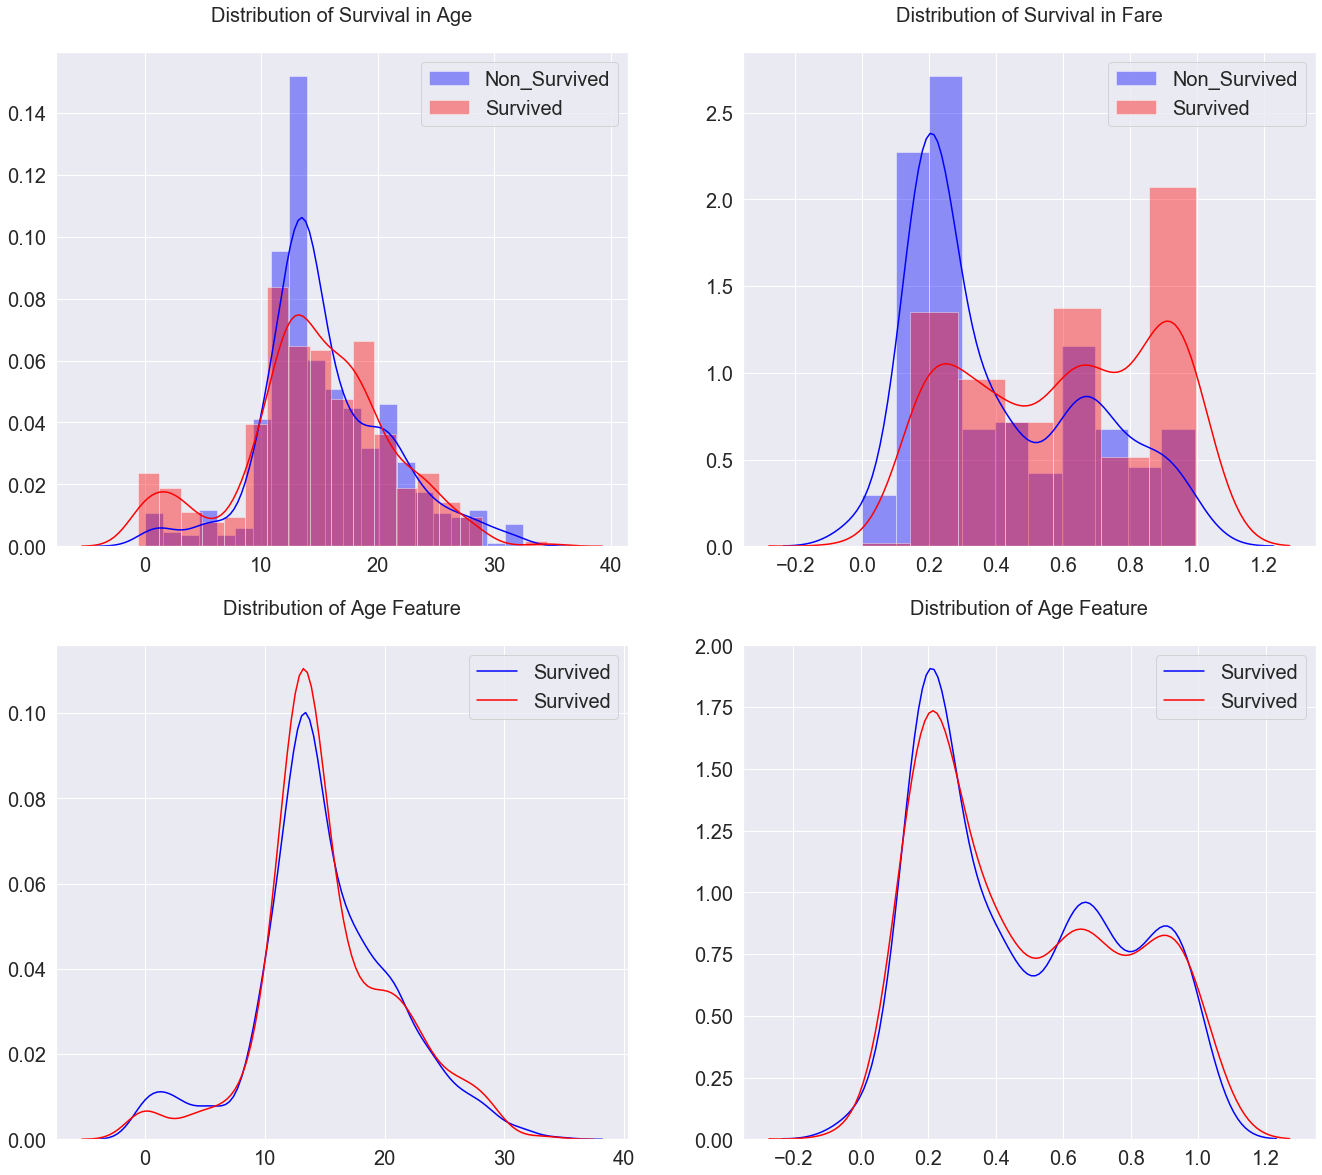

In [57]:
fig, axs = mp.subplots(ncols=2, nrows=2, figsize=(20, 20))
mp.subplots_adjust(right=1)

for i, feature in enumerate(cont_feature):
    sns.distplot(df_train[~surv][feature], label='Non_Survived', hist=True, color='#0000ff', ax=axs[0][i])
    sns.distplot(df_train[surv][feature], label='Survived',hist=True, color='#ff0000' ,ax=axs[0][i])
    
    sns.distplot(df_train[feature], label='Survived',hist=False, color='#0000ff' ,ax=axs[1][i])
    sns.distplot(df_test[feature], label='Survived',hist=False, color='#ff0000' ,ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):
        axs[i][j].tick_params(labelsize=20)
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)
    axs[1][i].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
mp.show()

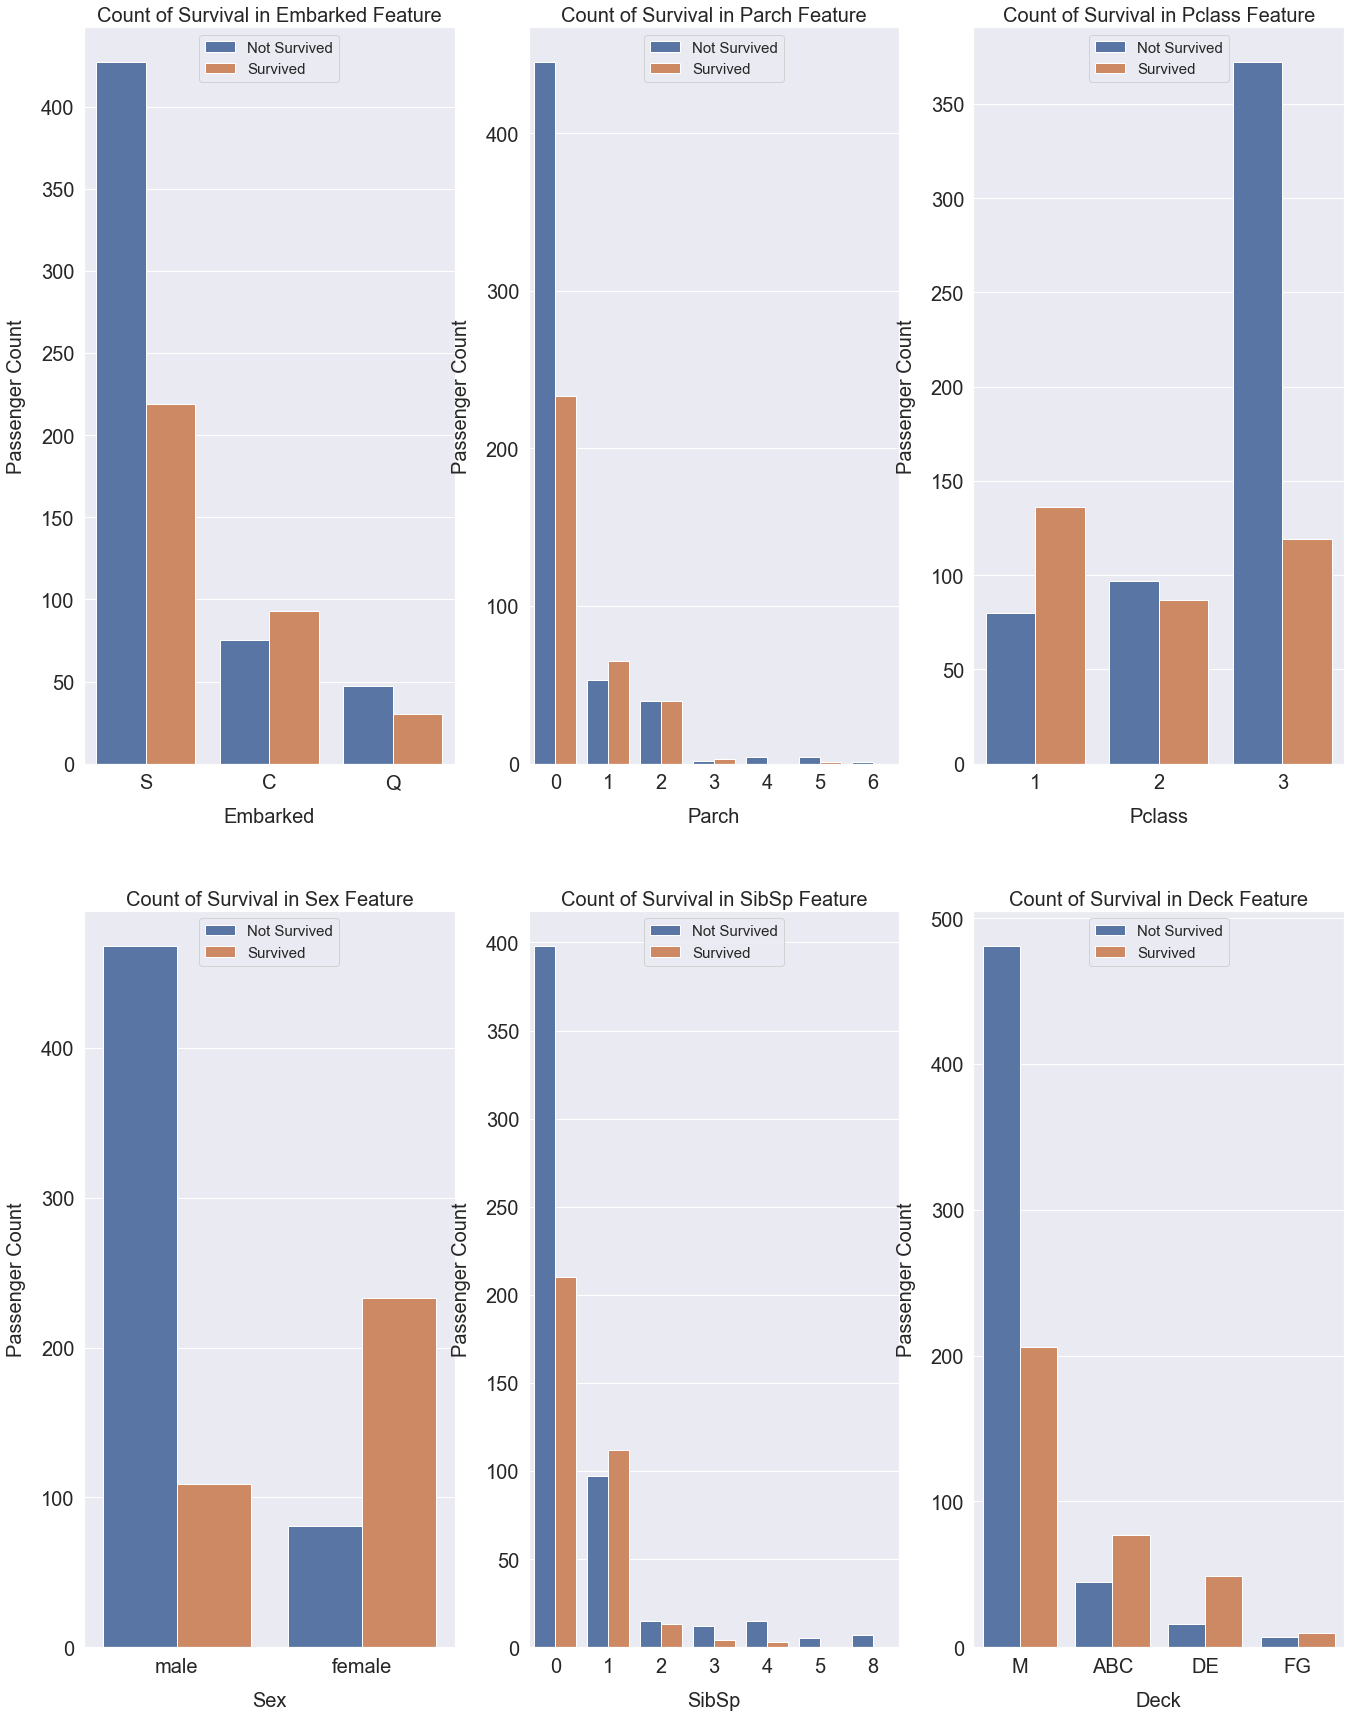

In [61]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = mp.subplots(ncols=3, nrows=2, figsize=(20, 20))
mp.subplots_adjust(right=1, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    mp.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    mp.xlabel('{}'.format(feature), size=20, labelpad=15)
    mp.ylabel('Passenger Count', size=20, labelpad=15)    
    mp.tick_params(axis='x', labelsize=20)
    mp.tick_params(axis='y', labelsize=20)
    
    mp.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 15})
    mp.title('Count of Survival in {} Feature'.format(feature), size=20)

mp.show()

In [62]:
df_all = concat_df(df_train, df_test)
df_all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,12.246655,M,S,0.176759,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,19.141681,ABC,C,0.909758,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,14.062534,M,S,0.201282,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,17.914911,ABC,S,0.856764,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,17.914911,M,S,0.205808,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


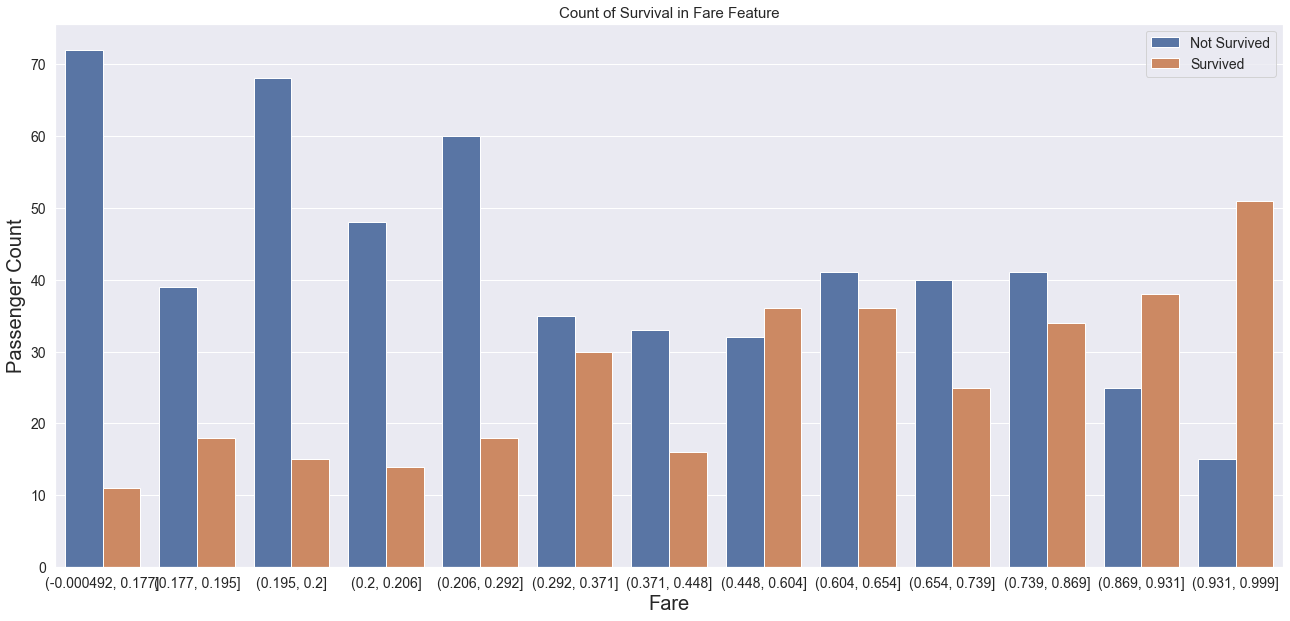

In [63]:
df_all['Fare'] = pd.qcut(df_all['Fare'],13)

fig, axs = mp.subplots(figsize=(22, 10))
sns.countplot(x='Fare', hue='Survived', data=df_all)

mp.xlabel('Fare', fontsize=20)
mp.ylabel('Passenger Count', fontsize=20)
mp.tick_params(labelsize=14)
mp.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':14})
mp.title('Count of Survival in {} Feature'.format('Fare'), fontsize=15)
mp.show()

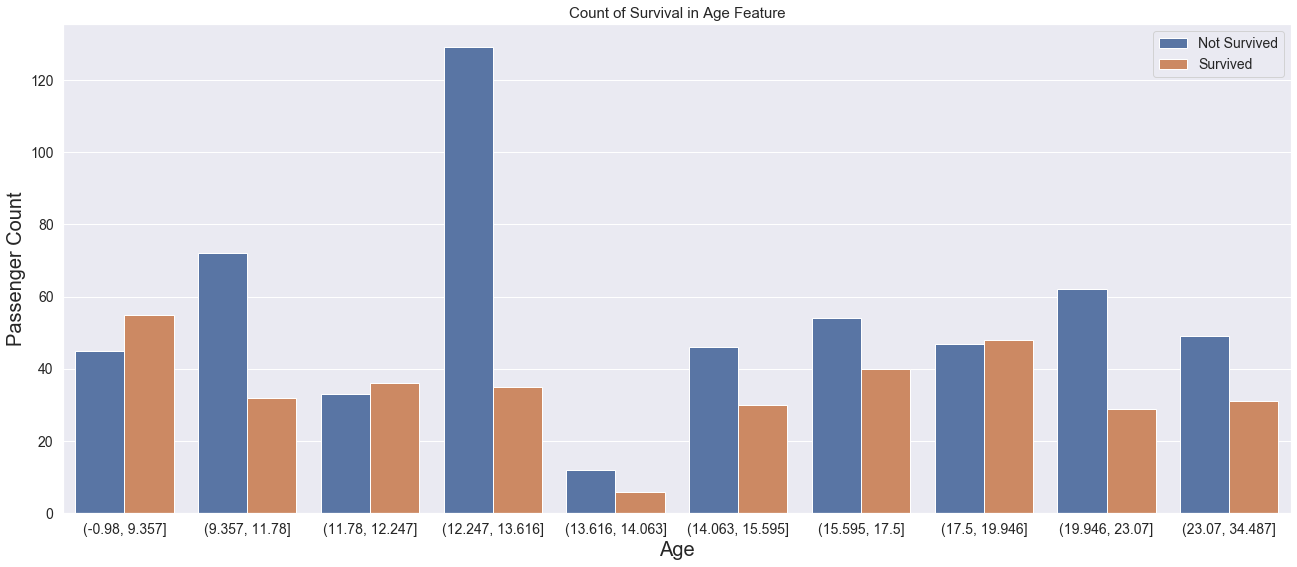

In [64]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

fig, axs = mp.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

mp.xlabel('Age', fontsize=20)
mp.ylabel('Passenger Count', fontsize=20)
mp.tick_params(labelsize=14)
mp.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':14})
mp.title('Count of Survival in {} Feature'.format('Age'), fontsize=15)
mp.show()

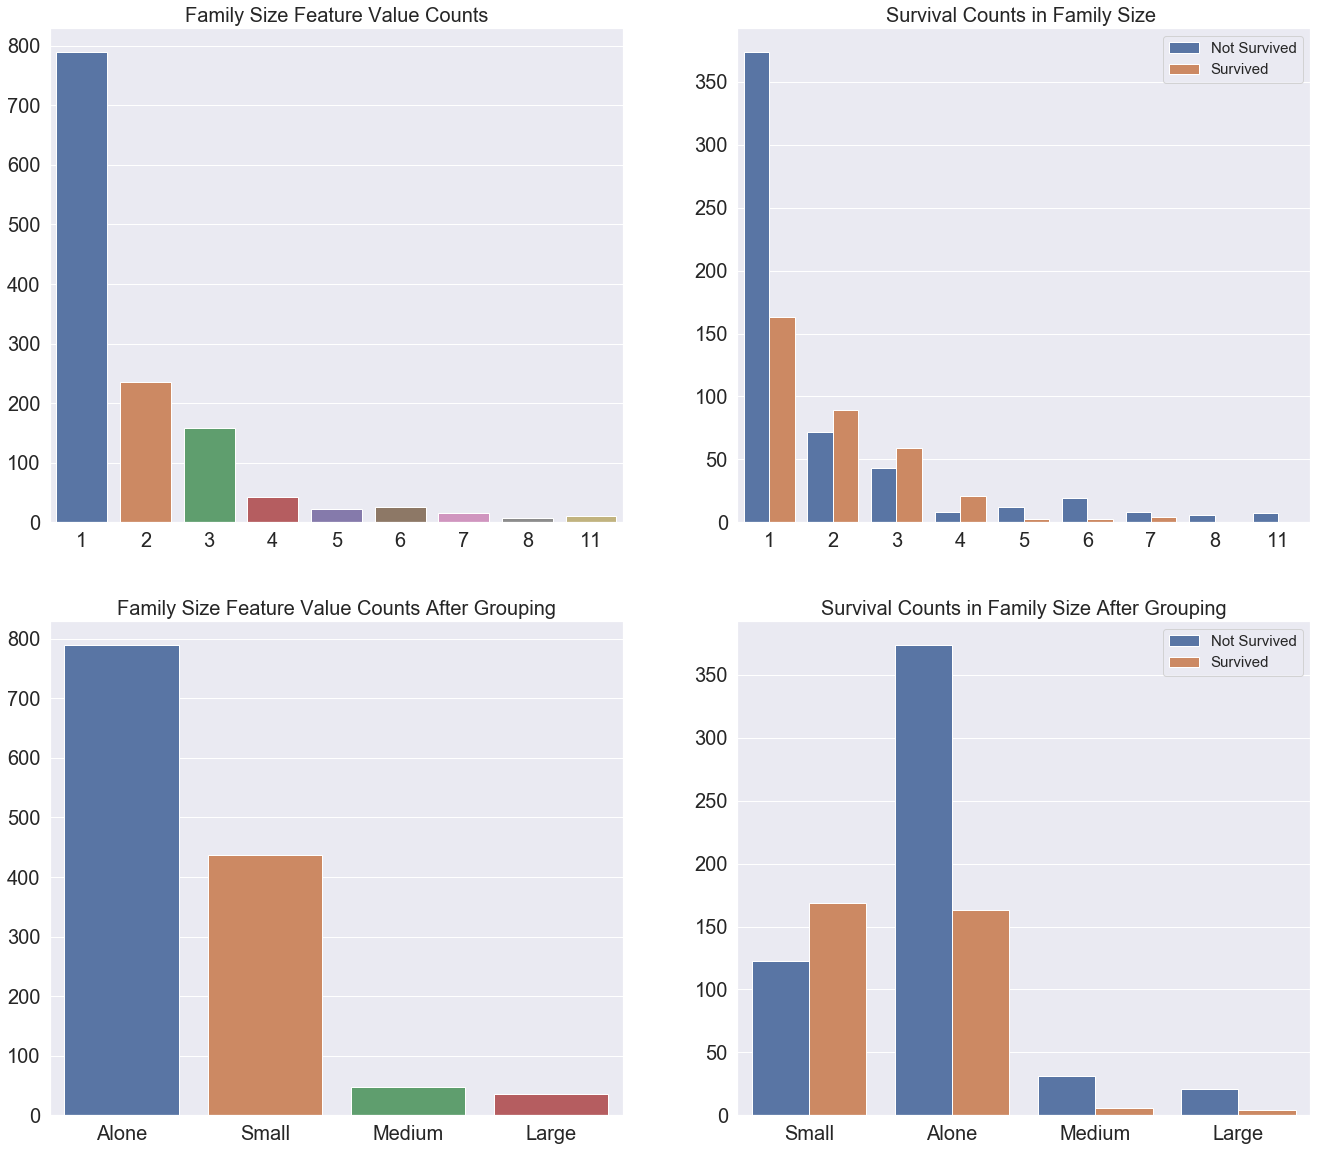

In [65]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
fig, axs = mp.subplots(nrows=2, ncols=2, figsize=(20, 20))
mp.subplots_adjust(right=1)

sns.barplot(x=df_all['Family_Size'].value_counts().index,
            y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])
axs[0][0].set_title('Family Size Feature Value Counts', size=20)
axs[0][1].set_title('Survival Counts in Family Size ', size=20)

family_map = {1:'Alone', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 6:'Medium',
              7:'Large', 8:'Large', 11:'Large'}
df_all['Family_Size_Group'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Group'].value_counts().index,
            y=df_all['Family_Size_Group'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Group', hue='Survived', data=df_all, ax=axs[1][1])
axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
    for j in range(2):
        axs[i][j].tick_params(labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
mp.show()

In [66]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')
df_all['Ticket_Frequency']

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: Ticket_Frequency, Length: 1309, dtype: int64

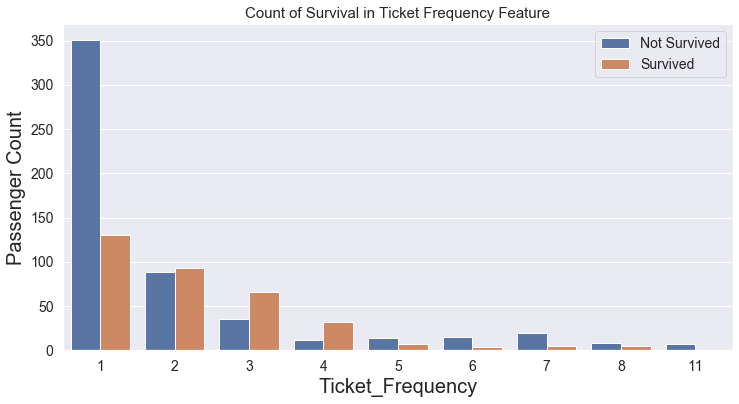

In [70]:
fig, axs = mp.subplots(figsize=(12, 6))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

mp.xlabel('Ticket_Frequency', fontsize=20)
mp.ylabel('Passenger Count', fontsize=20)
mp.tick_params(labelsize=14)
mp.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':14})
mp.title('Count of Survival in {} Feature'.format('Ticket Frequency'), fontsize=15)
mp.show()

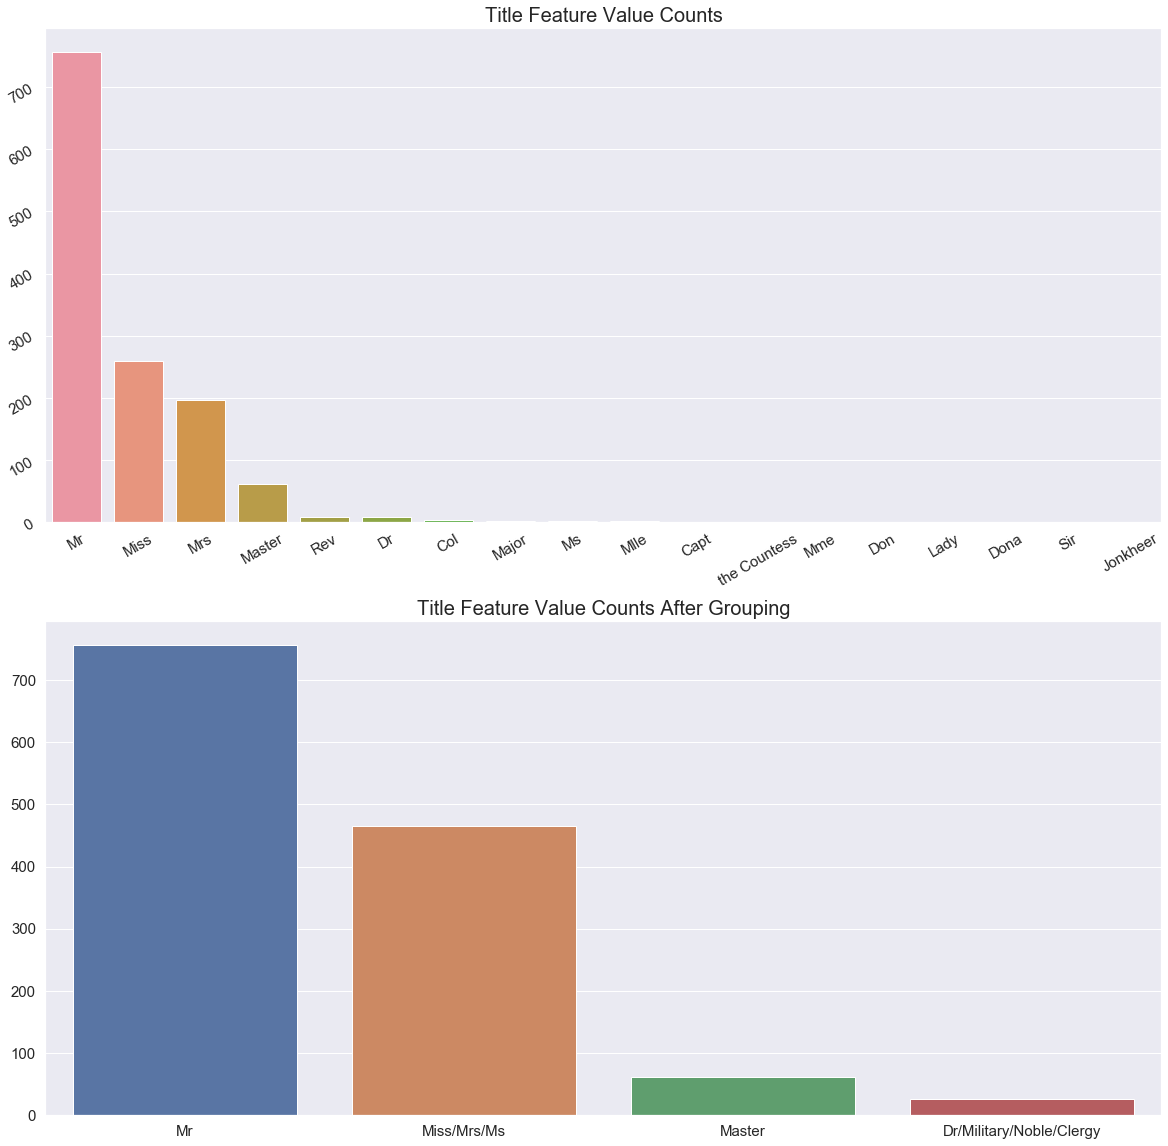

In [71]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Merried'] = 0
df_all['Is_Merried'].loc[df_all['Title'] == 'Mrs'] == 1

fig, axs = mp.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(labelrotation=30, labelsize=15)
axs[1].tick_params(labelsize=15)
axs[0].set_title('Title Feature Value Counts', size=20)
df_all['Title'] = df_all['Title'].replace(['Mlle', 'Mrs', 'Miss', 'Mme', 'Ms', 'Lady',
                                           'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col',
                                           'Capt', 'Jonkheer'], 'Dr/Military/Noble/Clergy')
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20)
mp.show()

In [72]:
def create_families(data):
    families = []
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_backet = name.split('(')[0]
        else:
            name_no_backet = name
        family = name.split(',')[0]
        for c in string.punctuation:
            family = family.replace(c,'').strip()
    
        families.append(family)
    return families
df_all['Family'] = create_families(df_all['Name'])
df_all['Family']

0              Braund
1             Cumings
2           Heikkinen
3            Futrelle
4               Allen
            ...      
1304          Spector
1305    Oliva y Ocana
1306          Saether
1307             Ware
1308            Peter
Name: Family, Length: 1309, dtype: object

In [73]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]
df_train

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Group,Ticket_Frequency,Title,Is_Merried,Family
0,"(11.78, 12.247]",M,S,"(-0.000492, 0.177]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0,Braund
1,"(17.5, 19.946]",ABC,C,"(0.869, 0.931]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,0,Cumings
2,"(13.616, 14.063]",M,S,"(0.2, 0.206]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0,Heikkinen
3,"(17.5, 19.946]",ABC,S,"(0.739, 0.869]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,0,Futrelle
4,"(17.5, 19.946]",M,S,"(0.2, 0.206]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,"(14.063, 15.595]",M,S,"(0.292, 0.371]","Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,1,Alone,1,Dr/Military/Noble/Clergy,0,Montvila
887,"(9.357, 11.78]",ABC,S,"(0.654, 0.739]","Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,1,Alone,1,Miss/Mrs/Ms,0,Graham
888,"(11.78, 12.247]",M,S,"(0.604, 0.654]","Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,4,Small,4,Miss/Mrs/Ms,0,Johnston
889,"(13.616, 14.063]",ABC,C,"(0.654, 0.739]","Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,1,Alone,1,Mr,0,Behr


In [74]:
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family', 'Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket', 'Ticket_Frequency'].median()
print(df_family_survival_rate)
print(df_ticket_survival_rate)

               Survived  Family_Size
Family                              
Abbing              0.0          1.0
Abbott              0.5          3.0
Abelson             0.5          2.0
Adahl               0.0          1.0
Adams               0.0          1.0
...                 ...          ...
de Mulder           1.0          1.0
de Pelsmaeker       0.0          1.0
del Carlo           0.0          2.0
van Billiard        0.0          3.0
van Melkebeke       0.0          1.0

[667 rows x 2 columns]
             Survived  Ticket_Frequency
Ticket                                 
110152            1.0                 3
110413            1.0                 3
110465            0.0                 2
110564            1.0                 1
110813            1.0                 2
...               ...               ...
W./C. 6608        0.0                 5
W./C. 6609        0.0                 1
W.E.P. 5734       0.0                 2
W/C 14208         0.0                 1
WE/P 5735      

In [75]:
family_rate = {}
ticket_rate = {}
for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rate[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]
for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rate[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]
print(family_rate)
print(ticket_rate)

{'Abbott': 0.5, 'Aks': 1.0, 'Allison': 0.0, 'Andersson': 0.0, 'Angle': 1.0, 'Asplund': 1.0, 'Astor': 1.0, 'Becker': 1.0, 'Boulos': 0.0, 'Brown': 1.0, 'Bryhl': 0.0, 'Caldwell': 1.0, 'Caram': 0.0, 'Cardeza': 1.0, 'Cavendish': 0.0, 'Chaffee': 0.0, 'Chapman': 0.0, 'Christy': 1.0, 'Chronopoulos': 0.0, 'Clarke': 1.0, 'Compton': 1.0, 'Coutts': 1.0, 'Cribb': 0.0, 'Crosby': 0.5, 'Cumings': 1.0, 'Danbom': 0.0, 'Davidson': 0.0, 'Davies': 0.0, 'Davison': 1.0, 'Dean': 0.5, 'Dodge': 1.0, 'Douglas': 0.0, 'Drew': 1.0, 'Duran y More': 1.0, 'Elias': 0.0, 'Faunthorpe': 1.0, 'Ford': 0.0, 'Fortune': 0.5, 'Frauenthal': 1.0, 'FrolicherStehli': 1.0, 'Gale': 0.0, 'Giles': 0.0, 'Goldsmith': 1.0, 'Goodwin': 0.0, 'Greenfield': 1.0, 'Hansen': 0.0, 'Harder': 1.0, 'Hays': 1.0, 'Herman': 1.0, 'Hirvonen': 1.0, 'Hocking': 0.5, 'Hold': 0.0, 'Ilmakangas': 0.0, 'Johnston': 0.0, 'Karun': 1.0, 'Kenyon': 1.0, 'Kiernan': 0.0, 'Kimball': 1.0, 'Kink': 0.0, 'KinkHeilmann': 1.0, 'Klasen': 0.0, 'Lahtinen': 0.0, 'Laroche': 1.0, 'Le

In [76]:
mean_survival_rate = df_train['Survived'].mean()
print(mean_survival_rate)
train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rate:
        train_family_survival_rate.append(family_rate[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)

for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rate:
        test_family_survival_rate.append(family_rate[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)

df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA
print(df_train['Family_Survival_Rate'])
print(df_train['Family_Survival_Rate_NA'])

0.3838383838383838
0      0.383838
1      1.000000
2      0.383838
3      0.383838
4      0.383838
         ...   
886    0.383838
887    0.383838
888    0.000000
889    0.383838
890    0.383838
Name: Family_Survival_Rate, Length: 891, dtype: float64
0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Family_Survival_Rate_NA, Length: 891, dtype: int64


In [77]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rate:
        train_ticket_survival_rate.append(ticket_rate[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)

for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rate:
        test_ticket_survival_rate.append(ticket_rate[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA
print(df_train['Ticket_Survival_Rate'])
print(df_train['Ticket_Survival_Rate_NA'])

0      0.383838
1      1.000000
2      0.383838
3      0.383838
4      0.383838
         ...   
886    0.383838
887    0.383838
888    0.000000
889    0.383838
890    0.383838
Name: Ticket_Survival_Rate, Length: 891, dtype: float64
0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Ticket_Survival_Rate_NA, Length: 891, dtype: int64


In [78]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Family_Survival_Rate'] + df['Ticket_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Family_Survival_Rate_NA'] + df['Ticket_Survival_Rate_NA']) / 2

In [79]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Group', 'Age', 'Fare']
for df in dfs:
    for feature in non_numeric_features:
        df[feature] = sp.LabelEncoder().fit_transform(df[feature])

In [80]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Group']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = sp.OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)
df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

In [81]:
df_all = concat_df(df_train, df_test)
drop_features = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Group', 'Survived',
                 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
                 'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA',
                 'Family_Survival_Rate_NA']
df_all.drop(columns=drop_features, inplace=True)
df_all.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Group_1,Family_Size_Group_2,...,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.000000,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.383838,0.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.383838,0.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0


In [82]:
X_train = sp.StandardScaler().fit_transform(df_train.drop(columns=drop_features))
y_train = df_train['Survived'].values
X_test = sp.StandardScaler().fit_transform(df_test.drop(columns=drop_features))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 26)
y_train shape: (891,)
X_test shape: (418, 26)


In [83]:
single_best_model = se.RandomForestClassifier(n_estimators=1100, max_depth=5, min_samples_split=4,
                                              min_samples_leaf=5, oob_score=True, random_state=SEED,
                                              n_jobs=-1, verbose=1)

In [86]:
leaderboard_model = se.RandomForestClassifier(n_estimators=1750, max_depth=7, min_samples_split=6,
                                              min_samples_leaf=6, oob_score=True, random_state=SEED,
                                              n_jobs=-1, verbose=1)

In [84]:
N = 5
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=df_all.columns)
skf = ms.StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

print(probs)
print(importances)

     Fold_1_Prob_0  Fold_1_Prob_1  Fold_2_Prob_0  Fold_2_Prob_1  \
0              0.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0.0   
2              0.0            0.0            0.0            0.0   
3              0.0            0.0            0.0            0.0   
4              0.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
413            0.0            0.0            0.0            0.0   
414            0.0            0.0            0.0            0.0   
415            0.0            0.0            0.0            0.0   
416            0.0            0.0            0.0            0.0   
417            0.0            0.0            0.0            0.0   

     Fold_3_Prob_0  Fold_3_Prob_1  Fold_4_Prob_0  Fold_4_Prob_1  \
0              0.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0

In [87]:
oob = 0
fprs, tprs, scores = [], [], []
for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    leaderboard_model.fit(X_train[trn_idx], y_train[trn_idx])
    trn_fpr, trn_tpr, trn_thresholds = sm.roc_curve(y_train[trn_idx], leaderboard_model.predict_proba(X_train[trn_idx])[:, 1])
    trn_auc_score = sm.auc(trn_fpr, trn_tpr)
    
    val_fpr, val_tpr, val_thresholds = sm.roc_curve(y_train[val_idx], leaderboard_model.predict_proba(X_train[val_idx])[:, 1])
    val_auc_score = sm.auc(val_fpr, val_tpr)
    
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
    
    oob += leaderboard_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))
print('Average OOB Score: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 1 OOB Score: 0.8567415730337079

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 2 OOB Score: 0.8469101123595506

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 3 OOB Score: 0.8274894810659187

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 4 OOB Score: 0.8288920056100981

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 5 OOB Score: 0.8431372549019608

Average OOB Score: 0.8406340853942473


In [88]:
probs

,Fold_1_Prob_0,Fold_1_Prob_1,Fold_2_Prob_0,Fold_2_Prob_1,Fold_3_Prob_0,Fold_3_Prob_1,Fold_4_Prob_0,Fold_4_Prob_1,Fold_5_Prob_0,Fold_5_Prob_1
0,0.899020,0.100980,0.902648,0.097352,0.905016,0.094984,0.907257,0.092743,0.901308,0.098692
1,0.454454,0.545546,0.477775,0.522225,0.531882,0.468118,0.543710,0.456290,0.499480,0.500520
2,0.885524,0.114476,0.900513,0.099487,0.868871,0.131129,0.907525,0.092475,0.873081,0.126919
3,0.861893,0.138107,0.866037,0.133963,0.853198,0.146802,0.874662,0.125338,0.852741,0.147259
4,0.209766,0.790234,0.240570,0.759430,0.234593,0.765407,0.219031,0.780969,0.250640,0.749360
...,...,...,...,...,...,...,...,...,...,...
413,0.895509,0.104491,0.922066,0.077934,0.894939,0.105061,0.892003,0.107997,0.890632,0.109368
414,0.047446,0.952554,0.045926,0.954074,0.049137,0.950863,0.051903,0.948097,0.026624,0.973376
415,0.906372,0.093628,0.919846,0.080154,0.911370,0.088630,0.907061,0.092939,0.893726,0.106274
416,0.895509,0.104491,0.922066,0.077934,0.894939,0.105061,0.892003,0.107997,0.890632,0.109368


In [89]:
importances

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5
Age,0.025380,0.030422,0.034218,0.030699,0.030409
Deck_1,0.043274,0.045538,0.053275,0.052263,0.046018
Deck_2,0.039908,0.041005,0.038546,0.037739,0.038899
Deck_3,0.000000,0.000000,0.000000,0.000000,0.000000
Deck_4,0.132202,0.134791,0.133420,0.131234,0.143885
Embarked_1,0.011462,0.012268,0.014120,0.011890,0.013964
Embarked_2,0.021127,0.027350,0.029044,0.031605,0.024077
Embarked_3,0.009770,0.012426,0.011354,0.013326,0.011113
Family_Size_Group_1,0.042530,0.061557,0.059131,0.060725,0.063586
Family_Size_Group_2,0.146345,0.134252,0.132871,0.134400,0.132807


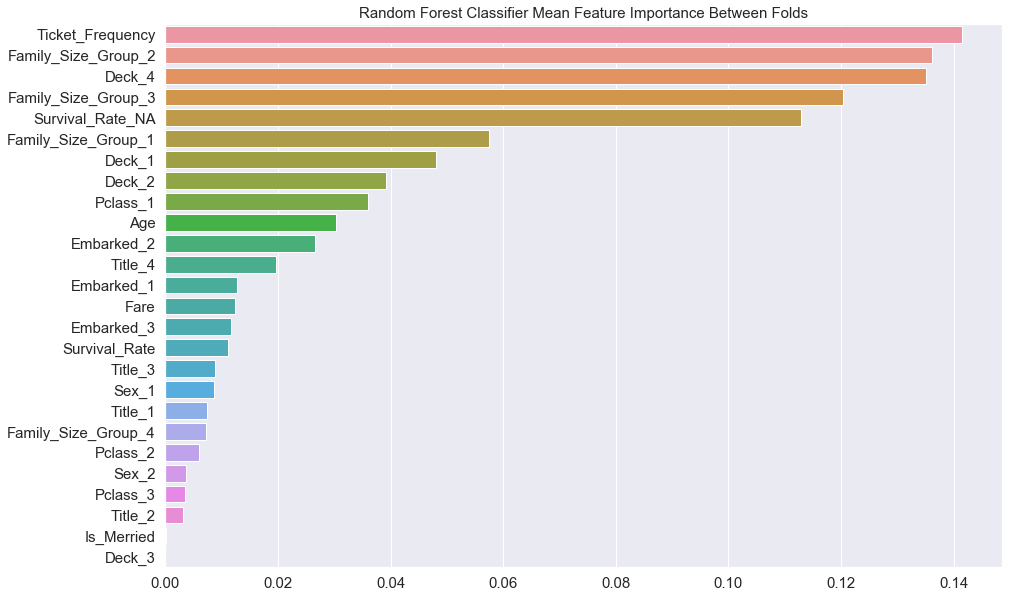

In [97]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

mp.figure(figsize=(15, 10))
sns.barplot(x=importances['Mean_Importance'], y=importances.index, data=importances)

mp.xlabel('')
mp.tick_params(labelsize=15)
mp.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)
mp.show()

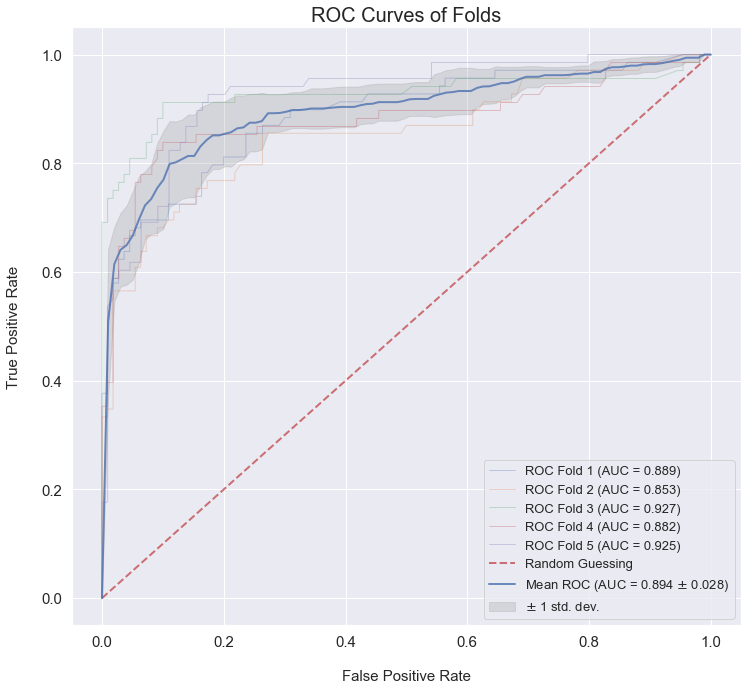

In [102]:
def plot_roc_curve(fprs, tprs):
    tprs_interp = []
    mean_fpr = np.linspace(0, 1, 100)
    aucs = []
    fig, ax = mp.subplots(figsize=(12, 11))
    
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = sm.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
    
    ax.plot([0, 1], [0, 1], lw=2, alpha=0.8, color='r', linestyle='--', label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = sm.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    ax.plot(mean_fpr, mean_tpr, c='b', lw=2, alpha=0.8, label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))
    
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_upper, tprs_lower, color='gray', alpha=0.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20)
    ax.legend(loc='lower right', prop={'size': 13})
    
    mp.show()
plot_roc_curve(fprs, tprs)

In [92]:
class_survived = [col for col in probs.columns if col.endswith('Prob_1')]

In [93]:
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=['Fold_1_Prob_1', 'Fold_2_Prob_1', 'Fold_3_Prob_1', 'Fold_4_Prob_1', 'Fold_5_Prob_1', '1']).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1
print(probs)

     Fold_1_Prob_0  Fold_1_Prob_1  Fold_2_Prob_0  Fold_2_Prob_1  \
0         0.899020       0.100980       0.902648       0.097352   
1         0.454454       0.545546       0.477775       0.522225   
2         0.885524       0.114476       0.900513       0.099487   
3         0.861893       0.138107       0.866037       0.133963   
4         0.209766       0.790234       0.240570       0.759430   
..             ...            ...            ...            ...   
413       0.895509       0.104491       0.922066       0.077934   
414       0.047446       0.952554       0.045926       0.954074   
415       0.906372       0.093628       0.919846       0.080154   
416       0.895509       0.104491       0.922066       0.077934   
417       0.265594       0.734406       0.248764       0.751236   

     Fold_3_Prob_0  Fold_3_Prob_1  Fold_4_Prob_0  Fold_4_Prob_1  \
0         0.905016       0.094984       0.907257       0.092743   
1         0.531882       0.468118       0.543710       0.4562

In [94]:
y_pred = probs['pred'].astype(int)
final = pd.DataFrame()
final['PassengerId'] = df_test['PassengerId']
final['Survived'] = y_pred.values
final.to_csv('final_submit.csv', header=True, index=False)
final.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
